# Методы оптимизации: Спуск в долину

Представьте, что вы стоите в густом тумане посреди огромной горной долины. Ваша задача — найти самую низкую точку (озеро на дне долины), но вы видите землю только в радиусе одного шага. Как это сделать?

> **Оптимизация — это и есть процесс поиска самой низкой точки в долине.**

В мире машинного обучения:
*   **"Долина"** — это наша **функция ошибки (потерь)**. Чем выше мы в долине, тем больше ошибка нашей модели.
*   **Наше положение (координаты)** — это **параметры (веса)** нашей модели.
*   **Самая низкая точка** — это набор **идеальных параметров**, при которых модель ошибается меньше всего.

У нас есть один волшебный инструмент — **компас**. Но этот компас всегда указывает в сторону самого крутого **подъема** наверх. Этот компас — **градиент**.

Чтобы спуститься вниз, нам нужно просто делать шаг в **противоположном** направлении от того, куда указывает компас! Этот метод называется **градиентным спуском**.

### Визуализация "Долины"

Давайте создадим простую 3D-долину, математически описываемую функцией $f(x, y) = x^2 + y^2$. Ее самая низкая точка очевидна — это (0, 0). Посмотрим, сможет ли наш алгоритм ее найти.

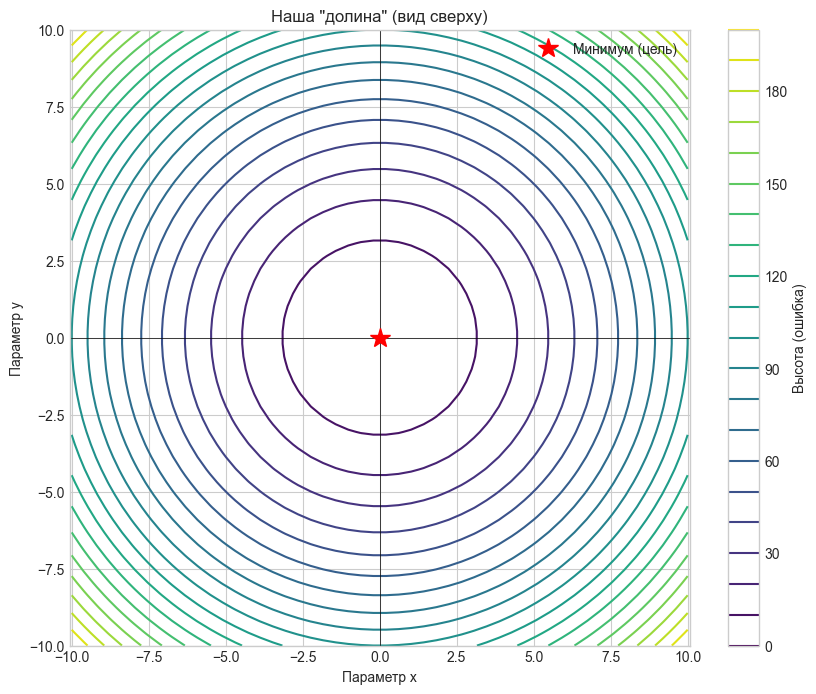

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

plt.style.use('seaborn-v0_8-whitegrid')

# Наша "долина" - функция ошибки
def loss_function(x, y):
    return x**2 + y**2

# Наш "компас" - градиент. Он показывает направление самого крутого подъема.
# Производная от x^2 + y^2 по x это 2x, а по y это 2y.
def gradient(x, y):
    return np.array([2*x, 2*y])

# --- Визуализация ---
x_grid = np.linspace(-10, 10, 50)
y_grid = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x_grid, y_grid)
Z = loss_function(X, Y)

plt.figure(figsize=(10, 8))
# Рисуем контурный график (вид на долину сверху)
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contours, label='Высота (ошибка)')
plt.title('Наша "долина" (вид сверху)')
plt.xlabel('Параметр x')
plt.ylabel('Параметр y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.plot(0, 0, 'r*', markersize=15, label='Минимум (цель)')
plt.legend()
plt.axis('equal')
plt.show()

### Алгоритм градиентного спуска

Сам алгоритм очень прост:
1.  Начать в случайной точке долины.
2.  Посмотреть, куда указывает "компас" (вычислить градиент).
3.  Сделать небольшой шаг в **противоположную** сторону.
4.  Повторять шаги 2 и 3, пока не окажемся на дне.

Размер шага — это критически важный параметр, который называется **скоростью обучения (learning rate)**.

### Интерактивная демонстрация

**Поиграйте со слайдерами, чтобы увидеть, как это работает!**
*   **`learning_rate`**: Меняйте размер шага. Посмотрите, что будет, если шаг слишком большой (мы "перепрыгиваем" через дно) или слишком маленький (спуск идет очень медленно).
*   **`num_steps`**: Управляйте количеством шагов, которые делает наш алгоритм.

In [2]:
# Импортируем Axes3D для создания 3D-графиков
from mpl_toolkits.mplot3d import Axes3D

def plot_gradient_descent(learning_rate, num_steps):
    # Начинаем в случайной точке
    point = np.array([9.0, 8.0])
    path = [point] # Будем хранить историю шагов

    # Делаем шаги
    for i in range(num_steps):
        grad = gradient(point[0], point[1])
        # Делаем шаг в направлении, обратном градиенту
        point = point - learning_rate * grad
        path.append(point)

    path = np.array(path)

    # --- Визуализация ---
    fig = plt.figure(figsize=(18, 8))

    # --- График 1: 2D вид сверху ---
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.contour(X, Y, Z, levels=20, cmap='viridis')
    ax1.plot(path[:, 0], path[:, 1], 'r-o', label='Путь спуска')
    ax1.plot(0, 0, 'g*', markersize=20, label='Минимум (цель)')
    ax1.set_title(f'2D вид сверху (скорость обучения = {learning_rate:.3f})')
    ax1.set_xlabel('Параметр x')
    ax1.set_ylabel('Параметр y')
    ax1.legend()
    ax1.axis('equal')

    # --- График 2: 3D вид ---
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    # Рисуем поверхность "долины"
    ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

    # Рисуем путь спуска в 3D
    path_z = loss_function(path[:, 0], path[:, 1])
    ax2.plot(path[:, 0], path[:, 1], path_z, 'r-o', linewidth=2, markersize=5, label='Путь спуска')

    # Отмечаем начальную и конечную точки
    ax2.plot(path[0,0], path[0,1], path_z[0], 'bo', markersize=10, label='Старт')
    ax2.plot(0, 0, 0, 'g*', markersize=20, label='Минимум (цель)')

    ax2.set_title('3D визуализация спуска')
    ax2.set_xlabel('Параметр x')
    ax2.set_ylabel('Параметр y')
    ax2.set_zlabel('Ошибка (высота)')
    ax2.legend()
    # Устанавливаем угол обзора для лучшей наглядности
    ax2.view_init(elev=30, azim=120)

    plt.suptitle('Градиентный спуск', fontsize=16)
    plt.show()


# Создаем интерактивные слайдеры
interact(
    plot_gradient_descent,
    learning_rate=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='Скорость обучения'),
    num_steps=IntSlider(min=1, max=50, step=1, value=10, description='Количество шагов')
);

print("Это и есть основа обучения нейронных сетей! Компьютер просто повторяет этот процесс миллионы раз для миллионов параметров, чтобы найти 'дно' функции ошибки.")

interactive(children=(FloatSlider(value=0.1, description='Скорость обучения', max=1.0, min=0.01, step=0.01), I…

Это и есть основа обучения нейронных сетей! Компьютер просто повторяет этот процесс миллионы раз для миллионов параметров, чтобы найти 'дно' функции ошибки.


Это и есть основа обучения нейронных сетей! Компьютер просто повторяет этот процесс миллионы раз для миллионов параметров, чтобы найти 'дно' функции ошибки.